In [17]:
%cd '/home/deepk/filter-generation/modeling/Sequence-VAE'
!ls

/home/deepk/filter-generation/modeling/Sequence-VAE
data		 main.py   Pipfile		  README.md	utils.py
filter_model.py  media	   Pipfile.lock		  settings.py
LICENSE		 model.py  play_with_model.ipynb  train.py
loss.py		 models    __pycache__		  untitled.txt


In [9]:
!python3 main.py

Epoch:  0
Training.......
| epoch   0 | elbo_loss 7.758405 | kl_loss 0.010367 | recons_loss 7.748038 
| epoch   0 | elbo_loss 7.135931 | kl_loss 0.002674 | recons_loss 7.133256 
| epoch   0 | elbo_loss 6.865808 | kl_loss 0.001091 | recons_loss 6.864717 
| epoch   0 | elbo_loss 6.707797 | kl_loss 0.000379 | recons_loss 6.707418 
| epoch   0 | elbo_loss 6.233048 | kl_loss 0.000194 | recons_loss 6.232854 
| epoch   0 | elbo_loss 6.068697 | kl_loss 0.000136 | recons_loss 6.068561 
Testing.......
{'elbo': [tensor(12.4844, device='cuda:0', grad_fn=<AddBackward0>), tensor(11.9110, device='cuda:0', grad_fn=<AddBackward0>), tensor(11.3926, device='cuda:0', grad_fn=<AddBackward0>), tensor(11.3918, device='cuda:0', grad_fn=<AddBackward0>), tensor(11.4400, device='cuda:0', grad_fn=<AddBackward0>), tensor(11.0250, device='cuda:0', grad_fn=<AddBackward0>), tensor(10.7980, device='cuda:0', grad_fn=<AddBackward0>), tensor(10.5636, device='cuda:0', grad_fn=<AddBackward0>), tensor(10.4796, device='cuda:

Figure(640x480)
{'elbo': [tensor(6.0092, device='cuda:0'), tensor(6.1293, device='cuda:0'), tensor(6.0436, device='cuda:0'), tensor(6.0031, device='cuda:0'), tensor(6.0322, device='cuda:0'), tensor(6.0398, device='cuda:0'), tensor(5.9888, device='cuda:0'), tensor(6.0259, device='cuda:0'), tensor(5.9824, device='cuda:0'), tensor(5.8832, device='cuda:0'), tensor(6.1294, device='cuda:0'), tensor(6.1306, device='cuda:0'), tensor(5.9764, device='cuda:0'), tensor(6.0865, device='cuda:0'), tensor(5.9086, device='cuda:0'), tensor(6.0003, device='cuda:0'), tensor(5.8463, device='cuda:0'), tensor(5.9977, device='cuda:0'), tensor(5.9643, device='cuda:0'), tensor(6.1175, device='cuda:0'), tensor(5.9836, device='cuda:0'), tensor(5.9326, device='cuda:0'), tensor(6.1125, device='cuda:0'), tensor(6.0042, device='cuda:0'), tensor(6.0444, device='cuda:0'), tensor(5.9603, device='cuda:0'), tensor(5.9688, device='cuda:0'), tensor(6.0938, device='cuda:0'), tensor(5.9828, device='cuda:0'), tensor(6.0696, de

In [36]:
import torch
import os
from loss import VAE_Loss
from model import LSTM_VAE
from train import Trainer

# from settings import global_setting, model_setting, training_setting
from utils import plot_elbo
# from utils import  interpolate, plot_elbo, get_latent_codes, visualize_latent_codes
torch.manual_seed(1000)

In [37]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"
device = "cuda" if torch.cuda.is_available() else "cpu"

In [38]:
bptt = 60
batch_size = 32
embed_size = 300
hidden_size = 256
latent_size = 16
lr = 0.001
epochs = 1
clip = 0.25

In [39]:
from data.ptb import PTB

train_data = PTB(data_dir="./data", split="train", create_data= False, max_sequence_length= bptt)
test_data = PTB(data_dir="./data", split="test", create_data= False, max_sequence_length=bptt)

# Batchify the data
train_loader = torch.utils.data.DataLoader( dataset= train_data, batch_size=batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader( dataset= test_data, batch_size= batch_size, shuffle= True)

vocab_size = train_data.vocab_size

In [40]:
model = LSTM_VAE(vocab_size = vocab_size, embed_size = embed_size, hidden_size = hidden_size, latent_size = latent_size).to(device)

Loss = VAE_Loss()
optimizer = torch.optim.Adam(model.parameters(), lr= lr)

trainer = Trainer(train_loader, test_loader, model, Loss, optimizer)

Epoch:  0
Training.......
| epoch   0 | elbo_loss 7.683918 | kl_loss 0.011050 | recons_loss 7.672868 
| epoch   0 | elbo_loss 7.353227 | kl_loss 0.002231 | recons_loss 7.350995 
| epoch   0 | elbo_loss 6.819628 | kl_loss 0.000618 | recons_loss 6.819010 
| epoch   0 | elbo_loss 6.581697 | kl_loss 0.000351 | recons_loss 6.581346 
| epoch   0 | elbo_loss 6.541600 | kl_loss 0.000287 | recons_loss 6.541314 
| epoch   0 | elbo_loss 6.063348 | kl_loss 0.000160 | recons_loss 6.063188 
Testing.......
{'elbo': [tensor(12.2021, device='cuda:0', grad_fn=<AddBackward0>), tensor(11.4382, device='cuda:0', grad_fn=<AddBackward0>), tensor(11.1613, device='cuda:0', grad_fn=<AddBackward0>), tensor(11.1539, device='cuda:0', grad_fn=<AddBackward0>), tensor(11.0743, device='cuda:0', grad_fn=<AddBackward0>), tensor(10.9698, device='cuda:0', grad_fn=<AddBackward0>), tensor(10.8379, device='cuda:0', grad_fn=<AddBackward0>), tensor(10.8713, device='cuda:0', grad_fn=<AddBackward0>), tensor(10.5538, device='cuda:

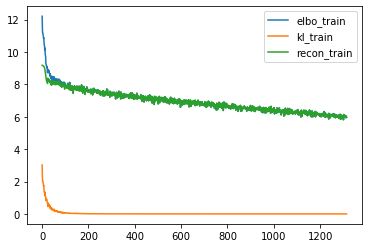

{'elbo': [tensor(5.9574, device='cuda:0'), tensor(6.0269, device='cuda:0'), tensor(5.9269, device='cuda:0'), tensor(5.8741, device='cuda:0'), tensor(5.9966, device='cuda:0'), tensor(6.0791, device='cuda:0'), tensor(5.9940, device='cuda:0'), tensor(6.0854, device='cuda:0'), tensor(5.8810, device='cuda:0'), tensor(5.8373, device='cuda:0'), tensor(6.0340, device='cuda:0'), tensor(6.1111, device='cuda:0'), tensor(5.9075, device='cuda:0'), tensor(5.9814, device='cuda:0'), tensor(6.0070, device='cuda:0'), tensor(5.8751, device='cuda:0'), tensor(6.0397, device='cuda:0'), tensor(5.9676, device='cuda:0'), tensor(6.0209, device='cuda:0'), tensor(5.9137, device='cuda:0'), tensor(6.1061, device='cuda:0'), tensor(5.9460, device='cuda:0'), tensor(5.9767, device='cuda:0'), tensor(5.9326, device='cuda:0'), tensor(6.0022, device='cuda:0'), tensor(5.9659, device='cuda:0'), tensor(6.0171, device='cuda:0'), tensor(6.0583, device='cuda:0'), tensor(6.1257, device='cuda:0'), tensor(5.9696, device='cuda:0'), 

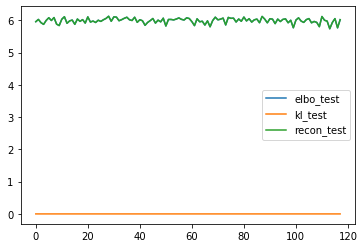

In [41]:
train_losses = []
test_losses = []
for epoch in range(epochs):
    print("Epoch: ", epoch)
    print("Training.......")
    train_losses = trainer.train(train_losses, epoch, batch_size, clip)
    print("Testing.......")
    test_losses = trainer.test(test_losses, epoch, batch_size)


plot_elbo(train_losses, "train")
plot_elbo(test_losses, "test")

In [42]:
MODEL_SAVE_PATH = "./models/lstm_vae_run1.pt"
torch.save(model.state_dict(), model_save_path)

## Inference

In [43]:
model = LSTM_VAE(vocab_size = vocab_size, embed_size = embed_size, hidden_size = hidden_size, latent_size = latent_size).to(device)
model.load_state_dict(torch.load(MODEL_SAVE_PATH))
model.eval()

LSTM_VAE(
  (embed): Embedding(9839, 300)
  (encoder_lstm): LSTM(300, 256, batch_first=True)
  (mean): Linear(in_features=256, out_features=16, bias=True)
  (log_variance): Linear(in_features=256, out_features=16, bias=True)
  (init_hidden_decoder): Linear(in_features=16, out_features=256, bias=True)
  (decoder_lstm): LSTM(300, 256, batch_first=True)
  (output): Linear(in_features=256, out_features=9839, bias=True)
  (log_softmax): LogSoftmax()
)

In [48]:
z1 = torch.randn(1,1,latent_size).to(device)
z2 = torch.randn(1,1,latent_size).to(device)

sos = "<sos>"    
sample1 = model.inference(10 , sos, z1)
sample2 = model.inference(10 , sos , z2)

print(sample1)
print(sample2)

the company said it will be <unk> by the company
the company said it will be <unk> by the company
